# Extend to EOC

Use EQW to extend to end of century

Inputs:
* Harmonised GHG total until 2050

Outputs:
* Full set of gases to run through MAGICC till 2100

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import os

import silicone.database_crunchers
from silicone.time_projectors import ExtendLatestTimeQuantile
import scmdata
import scmdata.database
import matplotlib.pyplot as plt

from tqdm.autonotebook import tqdm

# from ndcs.infilling import TimeDepRatio  # This is for a bugfix
from ndcs.constants import PROCESSED_DATA_DIR, NDC_TARGET_RELEASE, RAW_DATA_DIR

<IPython.core.display.Javascript object>

In [5]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [6]:
GLOBAL_DATABASE_DIR = os.path.join(
    PROCESSED_DATA_DIR, "global_emissions_pathways", NDC_TARGET_RELEASE
)

<IPython.core.display.Javascript object>

In [7]:
global_db = scmdata.database.ScmDatabase(
    GLOBAL_DATABASE_DIR,
    levels=(
        "ambition",
        "conditionality",
        "country_extension",
        "exclude_hot_air",
        "pathway_id",
        "global_extension",
    ),
)
global_db

<scmdata.database.SCMDatabase (root_dir: /home/jared/code/cr/ndc-realisations-2021/src/ndcs/../data/processed/global_emissions_pathways/12Nov2021a_CR, levels: ('ambition', 'conditionality', 'country_extension', 'exclude_hot_air', 'pathway_id', 'global_extension'))>

<IPython.core.display.Javascript object>

In [6]:
input_scenarios = global_db.load()
input_scenarios["stage"] = "clean"
input_scenarios

Loading files:   0%|          | 0/5656 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 5656, timepoints: 41)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	     ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario  stage        unit                          variable
	0        high              C              2030  2021-08-02         exclude              n/a          COG  ...         309                 1   World   high__C  clean  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	1        high              C              2030  2021-10-10         exclude              n/a          PSE  ...         325                 1   World   high__C  clean  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	2        high              C              2030  2021-04-16         exclude              n/a          MKD  ...         277                 1   World   high__C  clean  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	3        high              C     

<IPython.core.display.Javascript object>

In [7]:
# Temporarily limit the set of pathways we are looking at
# 8/11/2021

<IPython.core.display.Javascript object>

In [8]:
# pathway_ids = sorted(input_scenarios.get_unique_meta("pathway_id"))[-15:]
# pathway_ids

<IPython.core.display.Javascript object>

In [9]:
# input_scenarios = input_scenarios.filter(pathway_id=pathway_ids)

<IPython.core.display.Javascript object>

In [10]:
input_scenarios.timeseries()

time                                                                                                                                                                                                                              2010-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id    pathway_num pathway_num_today region scenario stage unit       variable                                         
high     C              2030              2021-08-02 exclude         n/a              COG          NDC Factsheet 2021-08-02_1  309         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45085.555590   
                                          2021-10-10 exclude         n/a              PSE          NDC Factsheet 2021-10-10_1  325         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45085.555590   
                                          2021-04-16 exclude         n/a              MKD          NDC Factsheet 2021-04-16_1  277         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45085.555590   
                                          2018-11-30 exclude         n/a              SYR          NDC Factsheet 2018-11-30_1  193         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45113.146990   
                                          2020-12-09 exclude         n/a              NPL          NDC Factsheet 2020-12-09_3  219         3                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45086.288422   
                                          2016-10-20 exclude         n/a              DZA          NDC Factsheet 2016-10-20_1  90          1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45212.940466   
                                          2017-03-27 exclude         n/a              SLV          NDC Factsheet 2017-03-27_1  150         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45113.457373   
                                          2017-12-13 exclude         n/a              COD          NDC Factsheet 2017-12-13_1  179         1                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45050.548470   
                                          2016-11-02 exclude         n/a              STP          NDC Factsheet 2016-11-02_2  102         2                 World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45215.693698   
                                          2020-12-18 exclude         n/a              MLT          NDC Factsheet 2020-12-18_20 244         20                World  high__C  clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45085.854860   
...                                                                                                                                                                                                                                      ...   
low      U              SSP1BL            2018-02-22 include         n/a              TTO          NDC Factsheet 2018-02-22_1  181         1                 World  low__U   clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45060.238157   
                                          2017-05-08 include         n/a              GEO          NDC Factsheet 2017-05-08_1  153         1                 World  low__U   clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45109.039517   
                                          2016-09-21 include         n/a              GIN          NDC Factsheet 2016-09-21_10 59          10                World  low__U   clean Mt CO2 /yr Emissions|Total GHG excl. LULUCF  45189.189751   
                                          2020-12-24 include         n/a              NIC          NDC Factsheet 2020-12-24_1  252         1                 Wor

<IPython.core.display.Javascript object>

# Prep SR15 data for infilling

In [11]:
# harmonised using reduce_ratio_2080 (from API)
sr15_scenarios_harmonised = scmdata.ScmRun(
    os.path.join(
        RAW_DATA_DIR, "sr15-scenarios", "sr15_scenarios_default-c4c98252789fe3be.csv"
    ),
    lowercase_cols=True,
).resample("AS")

<IPython.core.display.Javascript object>

In [12]:
sr15_scenarios_harmonised["variable"] = [
    s.replace("Emissions|VOC", "Emissions|NMVOC")
    .replace("Emissions|HFC4310mee", "Emissions|HFC4310")
    .replace("Emissions|Sulfur", "Emissions|SOx")
    for s in sr15_scenarios_harmonised["variable"]
]

<IPython.core.display.Javascript object>

In [13]:
sr15_scenarios_harmonised.get_unique_meta("variable")

['Emissions|BC',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|CF4',
 'Emissions|CO',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC4310',
 'Emissions|NMVOC',
 'Emissions|OC',
 'Emissions|SF6',
 'Emissions|SOx',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|N2O',
 'Emissions|CH4']

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CO2 / yr'>

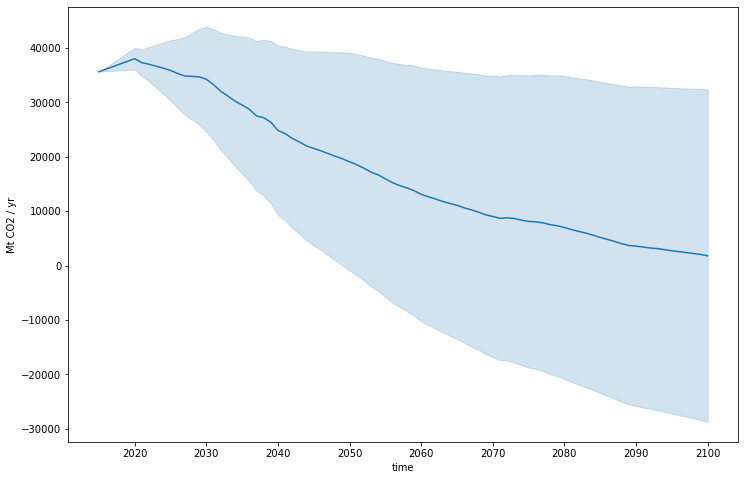

<IPython.core.display.Javascript object>

In [14]:
sr15_scenarios_harmonised.filter(variable="Emissions|CO2|MAGICC Fo*").lineplot(hue=None)

In [15]:
sr15_scenarios = sr15_scenarios_harmonised
sr15_scenarios.get_unique_meta("variable")

['Emissions|BC',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|CF4',
 'Emissions|CO',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC4310',
 'Emissions|NMVOC',
 'Emissions|OC',
 'Emissions|SF6',
 'Emissions|SOx',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|N2O',
 'Emissions|CH4']

<IPython.core.display.Javascript object>

In [16]:
sr15_scenarios["id"] = sr15_scenarios["model"] + "_" + sr15_scenarios["scenario"]
sr15_scenarios.timeseries()

time                                                                                                                                                       2015-01-01  2016-01-01  2017-01-01  2018-01-01  2019-01-01  2020-01-01  2021-01-01  ...  \
climate_model id                                      model             region scenario               stage      todo unit             variable                                                                                                ...   
unspecified   AIM_2_0_ADVANCE_2020_1.5C-2100          AIM_2_0           World  ADVANCE_2020_1.5C-2100 harmonised SET  Mt BC / yr       Emissions|BC           9.72742    9.633118    9.538557    9.444255    9.349953    9.255651    8.908679  ...   
                                                                                                                      kt C2F6 / yr     Emissions|C2F6         1.57000    1.731407    1.893257    2.054664    2.216071    2.377478    2.011908  ...   
                                                                                                                      kt C6F14 / yr    Emissions|C6F14        0.35000    0.320370    0.290660    0.261030    0.231400    0.201771    0.177436  ...   
                                                                                                                      kt CF4 / yr      Emissions|CF4         10.86990   10.992178   11.114790   11.237068   11.359345   11.481623    9.941812  ...   
                                                                                                                      Mt CO / yr       Emissions|CO         934.35000  926.954777  919.539293  912.144070  904.748847  897.353625  881.059883  ...   
                                                                                                                      kt HFC125 / yr   Emissions|HFC125      78.79060   89.085003   99.407611  109.702014  119.996417  130.290821  122.056125  ...   
                                                                                                                      kt HFC134a / yr  Emissions|HFC134a    201.95300  209.422978  216.913421  224.383399  231.853377  239.323355  221.487348  ...   
                                                                                                                      kt HFC143a / yr  Emissions|HFC143a     32.38100   37.021379   41.674472   46.314851   50.955231   55.595610   52.322797  ...   
                                                                                                                      kt HFC227ea / yr Emissions|HFC227ea     3.66330    3.246800    2.829158    2.412658    1.996158    1.579658    1.453916  ...   
                                                                                                                      kt HFC23 / yr    Emissions|HFC23       14.48570   11.822585    9.152174    6.489059    3.825944    1.162829    1.348248  ...   
...                                                                                                                                                               ...         ...         ...         ...         ...         ...         ...  ...   
              WITCH-GLOBIOM_4_2_ADVANCE_2030_WB2C     WITCH-GLOBIOM_4_2 World  ADVANCE_2030_WB2C      harmonised SET  Mt CH4 / yr      Emissions|CH4        388.07300  382.048857  376.008210  369.984067  363.959924  357.935781  359.756117  ...   
              WITCH-GLOBIOM_4_2_ADVANCE_INDC          WITCH-GLOBIOM_4_2 World  ADVANCE_INDC           harmonised SET  Mt CH4 / yr      Emissions|CH4        388.07300  382.048857  376.008210  369.984067  363.959924  357.935781  359.756117  ...   
              WITCH-GLOBIOM_4_2_ADVANCE_NoPolicy      WITCH-GLOBIOM_4_2 World  ADVANCE_NoPolicy       harmonised SET  Mt CH4 / yr      Emissions|CH4        388.07300  393.077222  398.095154  403.099376  408.103598  413.107820  416.884792  ...   
              WITCH-GLOBIOM_4_2_ADVANCE_Reference     WITCH-GLOB

<IPython.core.display.Javascript object>

In [17]:
sr15_scenarios.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial", year=range(2000, 2020)
).lineplot(legend=False)

<AxesSubplot:xlabel='time', ylabel='Mt CO2 / yr'>

<IPython.core.display.Javascript object>

In [18]:
sr15_scenarios.get_unique_meta("variable")

['Emissions|BC',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|CF4',
 'Emissions|CO',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC4310',
 'Emissions|NMVOC',
 'Emissions|OC',
 'Emissions|SF6',
 'Emissions|SOx',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|N2O',
 'Emissions|CH4']

<IPython.core.display.Javascript object>

In [19]:
# Excludes CO2|AFOLU
ghg_exclude_co2_vars = [
    "Emissions|C2F6",
    "Emissions|C6F14",
    "Emissions|CF4",
    "Emissions|CH4",
    #'Emissions|CO2|MAGICC AFOLU',
    "Emissions|CO2|MAGICC Fossil and Industrial",
    "Emissions|HFC125",
    "Emissions|HFC134a",
    "Emissions|HFC143a",
    "Emissions|HFC227ea",
    "Emissions|HFC23",
    "Emissions|HFC245fa",
    "Emissions|HFC32",
    "Emissions|HFC4310",
    "Emissions|N2O",
    "Emissions|SF6",
]


def calc_ghg(run, include_vars, var_name="GHG excl CO2 AFOLU", context="AR6GWP100"):
    keep_met = list(set(run.meta.columns) - {"variable"})
    ghgeq = (
        run.filter(variable=include_vars)
        .convert_unit("Mt CO2 / yr", context=context)
        .timeseries()
        .groupby(keep_met)
        .sum(min_count=1)
    )
    ghgeq["variable"] = "Emissions|{} ({})".format(var_name, context)
    ghgeq = scmdata.ScmRun(ghgeq)
    return ghgeq


contexts = ["AR6GWP100", "AR5GWP100", "AR4GWP100"]

sr15_scenarios_ghg = []


for context in contexts:
    ghgeq = calc_ghg(sr15_scenarios, include_vars=ghg_exclude_co2_vars, context=context)

    sr15_scenarios_ghg.append(ghgeq)

sr15_scenarios_ghg = scmdata.run_append(sr15_scenarios_ghg)
sr15_scenarios_ghg.timeseries()

time                                                                                                                                                                          2015-01-01    2016-01-01    2017-01-01    2018-01-01    2019-01-01  \
climate_model id                                      model             region scenario               stage      todo unit        variable                                                                                                         
unspecified   AIM_2_0_ADVANCE_2020_1.5C-2100          AIM_2_0           World  ADVANCE_2020_1.5C-2100 harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51494.530333  52188.563787  52880.700974  53572.838161   
              AIM_2_0_ADVANCE_2020_Med2C              AIM_2_0           World  ADVANCE_2020_Med2C     harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51477.475235  52154.406864  52829.488953  53504.571042   
              AIM_2_0_ADVANCE_2020_WB2C               AIM_2_0           World  ADVANCE_2020_WB2C      harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51494.685317  52188.874178  52881.166349  53573.458520   
              AIM_2_0_ADVANCE_2030_Med2C              AIM_2_0           World  ADVANCE_2030_Med2C     harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51481.815218  52163.098721  52842.520793  53521.942865   
              AIM_2_0_ADVANCE_2030_Price1.5C          AIM_2_0           World  ADVANCE_2030_Price1.5C harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51508.243159  52216.027007  52921.877020  53627.727032   
              AIM_2_0_ADVANCE_2030_WB2C               AIM_2_0           World  ADVANCE_2030_WB2C      harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51481.815218  52163.098721  52842.520793  53521.942865   
              AIM_2_0_ADVANCE_INDC                    AIM_2_0           World  ADVANCE_INDC           harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51517.391336  52234.348425  52949.346615  53664.344805   
              AIM_2_0_ADVANCE_NoPolicy                AIM_2_0           World  ADVANCE_NoPolicy       harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51783.462876  52767.220469  53748.290199  54729.359929   
              AIM_2_0_ADVANCE_Reference               AIM_2_0           World  ADVANCE_Reference      harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51478.513927  52156.487094  52832.607874  53508.728655   
              AIM_2_0_SSP1-19                         AIM_2_0           World  SSP1-19                harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50802.393146  51021.356709  51240.920172  51459.883735  51678.847297   
...                                                                                                                                                                                  ...           ...           ...           ...           ...   
              WITCH-GLOBIOM_4_2_ADVANCE_2030_WB2C     WITCH-GLOBIOM_4_2 World  ADVANCE_2030_WB2C      harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR4GWP100)  49846.415646  49883.286219  49920.257807  49957.128380  49993.998954   
              WITCH-GLOBIOM_4_2_ADVANCE_INDC          WITCH-GLOBIOM_4_2 World  ADVANCE_INDC           harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR4GWP100)  49846.415646  49883.286219  49920.257807  49957.128380  49993.998954   
              WITCH-GLOBIOM_4_2_ADVANCE_NoPolicy      WITCH-GLOBIOM_4_2 World  ADVANCE_NoPolicy       harmonised SET  Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR4GWP100)  49846.415646  51049.683407  52256.247792  53459.515553  54662.783314   
              WITCH-GLOBIOM_4_2_ADVANCE_Reference     WITCH-GLOBIOM_4_2 World  ADVANCE_Reference

<IPython.core.display.Javascript object>

In [20]:
bad_ids = scmdata.ScmRun(
    sr15_scenarios_ghg.timeseries()[(sr15_scenarios_ghg.values.max(axis=1) > 10e8)]
).get_unique_meta("id")
bad_ids

[]

<IPython.core.display.Javascript object>

In [21]:
assert not len(bad_ids)

<IPython.core.display.Javascript object>

In [22]:
sr15_scenarios_ghg

<scmdata.ScmRun (timeseries: 1233, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     climate_model                                       id              model region                scenario       stage todo         unit                                  variable
	0      unspecified           AIM_2_0_ADVANCE_2020_1.5C-2100            AIM_2_0  World  ADVANCE_2020_1.5C-2100  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	1      unspecified               AIM_2_0_ADVANCE_2020_Med2C            AIM_2_0  World      ADVANCE_2020_Med2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	2      unspecified                AIM_2_0_ADVANCE_2020_WB2C            AIM_2_0  World       ADVANCE_2020_WB2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	3      unspecified               AIM_2_0_ADVANCE_2030_Med2C            AIM_2_0  World      ADVANCE_2030_Med2C  harmonised  SET  Mt CO2 / yr  Emission

<IPython.core.display.Javascript object>

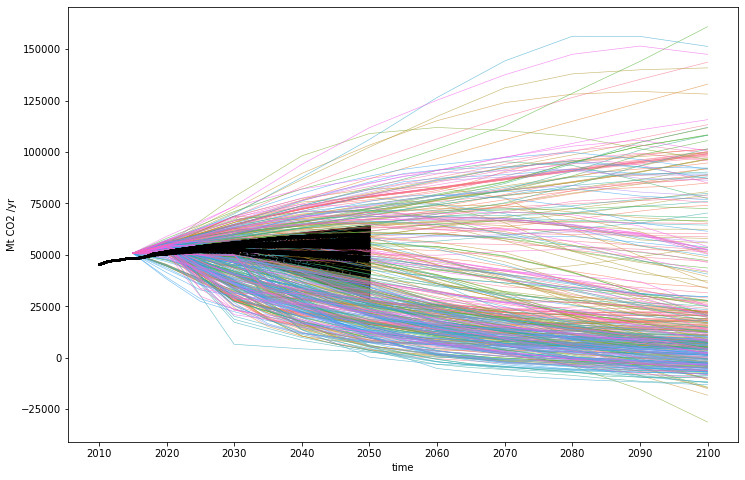

<IPython.core.display.Javascript object>

In [50]:
sr15_scenarios_ghg.filter(variable="*(AR6GWP100)").line_plot(
    hue="model", units="id", estimator=None, legend=False, lw=0.6, alpha=0.7
)
input_scenarios.line_plot(color="black", hue=None, style="pathway_id", legend=False)

# Basic Harmonisation

Harmonise the input scenarios to the harmonised SR1.5 values for GHG excl CO2 AFOLU

In [51]:
SCALING_YEAR = 2015

<IPython.core.display.Javascript object>

In [52]:
values_2010 = sr15_scenarios_ghg.filter(
    year=SCALING_YEAR,
    variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)",
    region="World",
).values.mean()

<IPython.core.display.Javascript object>

In [53]:
scaling_factor = values_2010 / input_scenarios.filter(year=SCALING_YEAR).values[0]
scaling_factor = scaling_factor.squeeze()
scaling_factor
# This factor is high because 1. we already harmonised in a previous step to a different history and 2. the GHG emissions still include AFOLU

array(1.05345812)

<IPython.core.display.Javascript object>

In [54]:
input_scenarios_harmonised = input_scenarios * float(scaling_factor)
input_scenarios_harmonised["stage"] = "harmonised"
input_scenarios_harmonised

<scmdata.ScmRun (timeseries: 5656, timepoints: 41)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	     ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario       stage        unit                          variable
	0        high              C              2030  2021-08-02         exclude              n/a          COG  ...         309                 1   World   high__C  harmonised  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	1        high              C              2030  2021-10-10         exclude              n/a          PSE  ...         325                 1   World   high__C  harmonised  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	2        high              C              2030  2021-04-16         exclude              n/a          MKD  ...         277                 1   World   high__C  harmonised  Mt CO2 /yr  Emissions|Total GHG excl. LULUCF
	3        high

<IPython.core.display.Javascript object>

In [55]:
input_scenarios_harmonised.lineplot()

<AxesSubplot:xlabel='time', ylabel='Mt CO2 /yr'>

<IPython.core.display.Javascript object>


# Extend using GHG quantiles

In [56]:
sorted(input_scenarios.get_unique_meta("pathway_id"))[-5:]

['2021-10-28_2',
 '2021-10-30_1',
 '2021-11-01_1',
 '2021-11-03_1',
 '2021-11-09_1']

<IPython.core.display.Javascript object>

In [57]:
START_YEAR = 2015
END_YEAR = 2050  # For ndc scenarios
LEAD = "Emissions|GHG excl CO2 AFOLU (AR6GWP100)"
CONTEXT = "AR6GWP100"
SELECTED_PATHWAY = "2021-10-18_1"
# SELECTED_PATHWAY = "high_R_rate"

<IPython.core.display.Javascript object>

In [58]:
sr15_data = scmdata.run_append([sr15_scenarios_ghg, sr15_scenarios])
sr15_data["id"] = sr15_data["model"] + "_" + sr15_data["scenario"]
sr15_data_cleaned = sr15_data.filter(year=range(START_YEAR, 2101))

<IPython.core.display.Javascript object>

In [59]:
sr15_data_cleaned.to_csv(os.path.join(PROCESSED_DATA_DIR, "sr15_data.csv"))

<IPython.core.display.Javascript object>

In [60]:
sr15_data_cleaned

<scmdata.ScmRun (timeseries: 10686, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      climate_model                                       id              model region                scenario       stage todo         unit                                  variable
	0       unspecified           AIM_2_0_ADVANCE_2020_1.5C-2100            AIM_2_0  World  ADVANCE_2020_1.5C-2100  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	1       unspecified               AIM_2_0_ADVANCE_2020_Med2C            AIM_2_0  World      ADVANCE_2020_Med2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	2       unspecified                AIM_2_0_ADVANCE_2020_WB2C            AIM_2_0  World       ADVANCE_2020_WB2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	3       unspecified               AIM_2_0_ADVANCE_2030_Med2C            AIM_2_0  World      ADVANCE_2030_Med2C  harmonised  SET  Mt CO2 / yr  Em

<IPython.core.display.Javascript object>

In [61]:
def extend_timeseries(infilling_database, scenario, lead=LEAD, smoothing=0):
    cruncher = ExtendLatestTimeQuantile(
        infilling_database.filter(year=range(2015, 2101, 5)).to_iamdataframe()
    )
    filler = cruncher.derive_relationship(lead, smoothing=smoothing)

    scenario["variable"] = lead
    extended_scenario = filler(scenario.to_iamdataframe())
    extended_scenario = scmdata.ScmRun(scenario.append(extended_scenario)).resample(
        "AS"
    )
    extended_scenario["stage"] = "extended"
    return extended_scenario

<IPython.core.display.Javascript object>

In [62]:
selected_scenario_clean = (
    input_scenarios.filter(pathway_id=SELECTED_PATHWAY)
    .convert_unit("Mt CO2 / yr")
    .filter(year=range(START_YEAR, END_YEAR + 1))
)
selected_scenario_clean

<scmdata.ScmRun (timeseries: 16, timepoints: 36)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	   ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario  stage         unit                          variable
	0      high              C              2030  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  clean  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	1      high              C              2030  2021-10-18         include              n/a          BHR  ...         343                 1   World   high__C  clean  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	2      high              C            SSP1BL  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  clean  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	3      high              C            S

<IPython.core.display.Javascript object>

In [63]:
selected_scenarios = input_scenarios_harmonised.convert_unit("Mt CO2 / yr").filter(
    year=range(START_YEAR, END_YEAR + 1)
)
selected_scenario = selected_scenarios.filter(pathway_id=SELECTED_PATHWAY)
selected_scenarios

<scmdata.ScmRun (timeseries: 5656, timepoints: 36)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	     ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario       stage         unit                          variable
	0        high              C              2030  2021-08-02         exclude              n/a          COG  ...         309                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	1        high              C              2030  2021-10-10         exclude              n/a          PSE  ...         325                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	2        high              C              2030  2021-04-16         exclude              n/a          MKD  ...         277                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	3        

<IPython.core.display.Javascript object>

In [37]:
pathways = selected_scenarios.get_unique_meta("pathway_id")

<IPython.core.display.Javascript object>

In [38]:
extended_scenario_all = scmdata.run_append(
    [
        extend_timeseries(sr15_data_cleaned, selected_scenarios.filter(pathway_id=p))
        for p in tqdm(pathways)
    ]
)
extended_scenario_2050 = extended_scenario_all.filter(pathway_id=SELECTED_PATHWAY)
# extended_scenario_2030 = extend_timeseries(
#     sr15_data_cleaned,
#     selected_scenarios.filter(pathway_id=SELECTED_PATHWAY).filter(
#         year=range(START_YEAR, 2030 + 1)
#     ),
# )

  0%|          | 0/354 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [39]:
selected_scenarios.filter(pathway_id=SELECTED_PATHWAY)

<scmdata.ScmRun (timeseries: 16, timepoints: 36)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	     ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario       stage         unit                          variable
	329      high              C              2030  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	683      high              C              2030  2021-10-18         include              n/a          BHR  ...         343                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	1037     high              C            SSP1BL  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  harmonised  Mt CO2 / yr  Emissions|Total GHG excl. LULUCF
	1391     hi

<IPython.core.display.Javascript object>

In [40]:
# extended_scenario_2030 = extend_timeseries(
#     sr15_data_cleaned,
#     selected_scenarios.filter(pathway_id=SELECTED_PATHWAY).filter(
#         year=range(START_YEAR, 2030 + 1)
#     ),
# )

<IPython.core.display.Javascript object>

In [41]:
extended_scenario_2050

<scmdata.ScmRun (timeseries: 16, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     ambition conditionality country_extension        date exclude_hot_air global_extension last_country  ... pathway_num pathway_num_today  region  scenario     stage         unit                                  variable
	5256     high              C              2030  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  extended  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	5257     high              C              2030  2021-10-18         include              n/a          BHR  ...         343                 1   World   high__C  extended  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	5258     high              C            SSP1BL  2021-10-18         exclude              n/a          BHR  ...         343                 1   World   high__C  extended  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU 

<IPython.core.display.Javascript object>

In [42]:
extended_scenario_2050.filter(exclude_hot_air="exclude").head()

time                                                                                                                                                                                                                                         2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit        variable                                                 
high     C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
low      C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   

time                                                                                                                                                                                                                                         2016-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit        variable                                                 
high     C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50904.230828   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50904.230828   
         U              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50904.230828   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50904.230828   
low      C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50904.230828   

time                                                                                                                                                                                                                                         2017-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit        variable                                

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Database CO$_2$ and lead emissions timeseries')

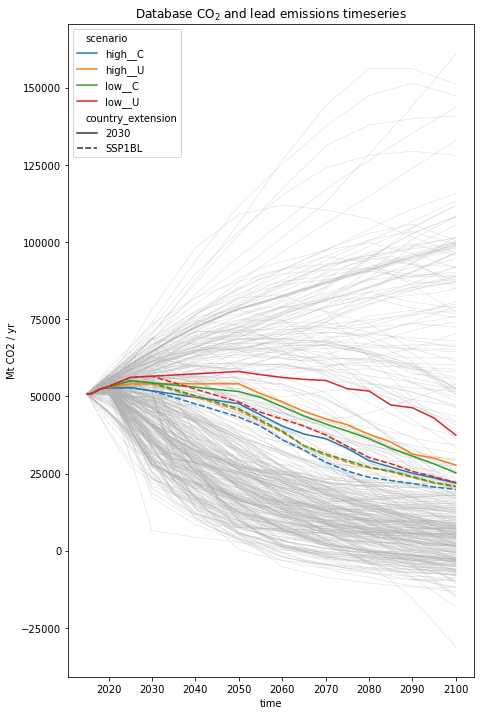

<IPython.core.display.Javascript object>

In [43]:
pkwargs = {
    "hue": None,
    "color": "0.7",
    "lw": 0.6,
    "alpha": 0.4,
    "units": "id",
    "estimator": None,
    "legend": False,
}

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(121)

sr15_data_cleaned.filter(variable=LEAD).lineplot(ax=ax, **pkwargs)
# extended_scenario_2050.lineplot(
#     ax=ax, hue="pathway_id", linestyle="--", dashes=(10, 15)
# )
extended_scenario_2050.filter(exclude_hot_air="exclude").lineplot(
    ax=ax, style="country_extension", estimator=None
)
ax.set_title("Database CO$_2$ and lead emissions timeseries")

In [44]:
LEAD

'Emissions|GHG excl CO2 AFOLU (AR6GWP100)'

<IPython.core.display.Javascript object>

In [45]:
sr15_data_cleaned.filter(variable=LEAD)

<scmdata.ScmRun (timeseries: 411, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	    climate_model                                       id              model region                scenario       stage todo         unit                                  variable
	0     unspecified           AIM_2_0_ADVANCE_2020_1.5C-2100            AIM_2_0  World  ADVANCE_2020_1.5C-2100  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	1     unspecified               AIM_2_0_ADVANCE_2020_Med2C            AIM_2_0  World      ADVANCE_2020_Med2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	2     unspecified                AIM_2_0_ADVANCE_2020_WB2C            AIM_2_0  World       ADVANCE_2020_WB2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG excl CO2 AFOLU (AR6GWP100)
	3     unspecified               AIM_2_0_ADVANCE_2030_Med2C            AIM_2_0  World      ADVANCE_2030_Med2C  harmonised  SET  Mt CO2 / yr  Emissions|GHG 

<IPython.core.display.Javascript object>

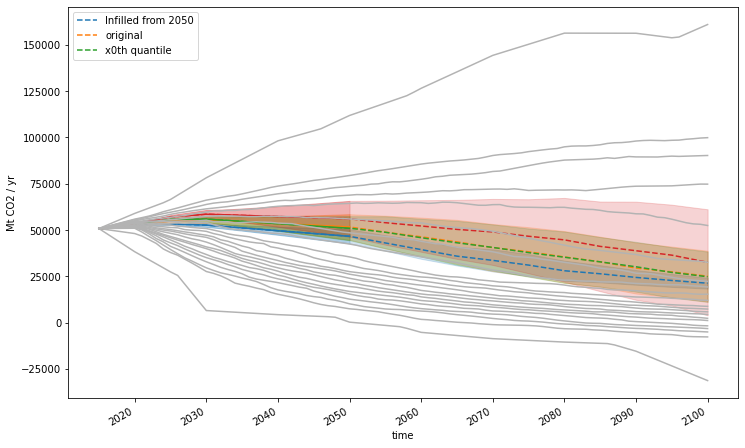

<IPython.core.display.Javascript object>

In [46]:
import numpy as np

extended_scenario_2050.filter(pathway_id=SELECTED_PATHWAY).lineplot(
    linestyle="--", dashes=(10, 15), label="Infilled from 2050", legend=False
)
# extended_scenario_2030.lineplot(
#     hue=None,
#     color="tab:orange",
#     linestyle="--",
#     dashes=(10, 15),
#     label="Infilled from 2030",
#     legend=False,
# )
selected_scenario.lineplot(label="original", legend=False)
sr15_data_cleaned.filter(variable=LEAD).quantiles_over(
    ("id", "scenario", "model", "category"), quantiles=np.arange(0, 1.01, 0.05)
).T.plot(ax=plt.gca(), legend=False, color="0.7")

plt.legend(["Infilled from 2050", "original", "x0th quantile"])

In [47]:
import numpy as np

extended_scenario_2050.filter(pathway_id=SELECTED_PATHWAY).lineplot(
    linestyle="--", dashes=(10, 15), label="Infilled from 2050", legend=False
)
# extended_scenario_2030.lineplot(
#     hue=None,
#     color="tab:orange",
#     linestyle="--",
#     dashes=(10, 15),
#     label="Infilled from 2030",
#     legend=False,
# )
extended_scenario_all.lineplot(
    label="original", legend=False, units="pathway_id", estimator=None
)
sr15_data_cleaned.filter(variable=LEAD).quantiles_over(
    ("id", "scenario", "model", "category"), quantiles=np.arange(0, 1.01, 0.05)
).T.plot(ax=plt.gca(), legend=False, color="0.7")

plt.legend(["Infilled from 2050", "original", "x0th quantile"])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Emissions|GHG excl CO2 AFOLU (AR6GWP100)')

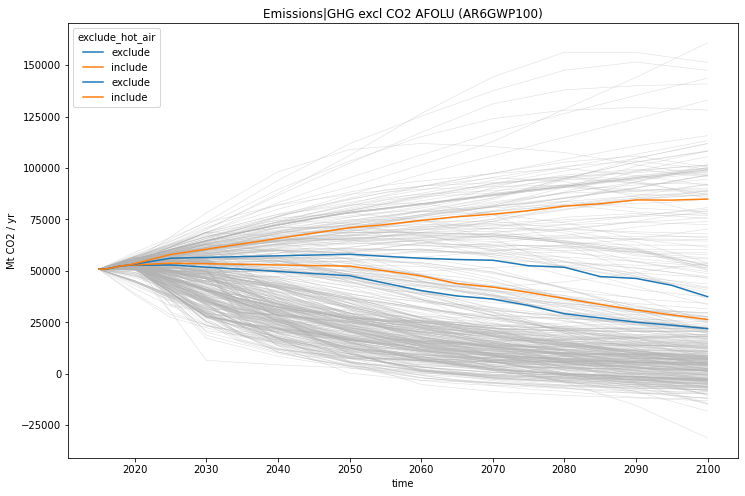

<IPython.core.display.Javascript object>

In [48]:
ax = plt.gca()

sr15_data_cleaned.filter(variable=LEAD).lineplot(ax=ax, **pkwargs)
extended_scenario_2050.filter(
    country_extension="2030",
    ambition="high",
    conditionality="C",
    pathway_id="2021-10-18_1",
    year=range(2015, 2101),
).lineplot(ax=ax, hue="exclude_hot_air")
extended_scenario_2050.filter(
    country_extension="2030",
    ambition="low",
    conditionality="U",
    pathway_id="2021-10-18_1",
    year=range(2015, 2101),
).lineplot(ax=ax, hue="exclude_hot_air")
ax.set_title(extended_scenario_2050.get_unique_meta("variable", True))

In [49]:
extended_scenario_all.to_csv(
    os.path.join(
        PROCESSED_DATA_DIR, "global_emissions_pathways", "emissions_ghg_extended.csv"
    )
)

<IPython.core.display.Javascript object>

In [64]:
extended_subset = extended_scenario_all.filter(
    pathway_id=[
        "2021-10-18_1",
        "2021-10-28_1",
        "2021-10-28_2",
        "2021-10-30-1",
        "2021-11-01_1",
    ]
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Emissions|GHG excl CO2 AFOLU (AR6GWP100)')

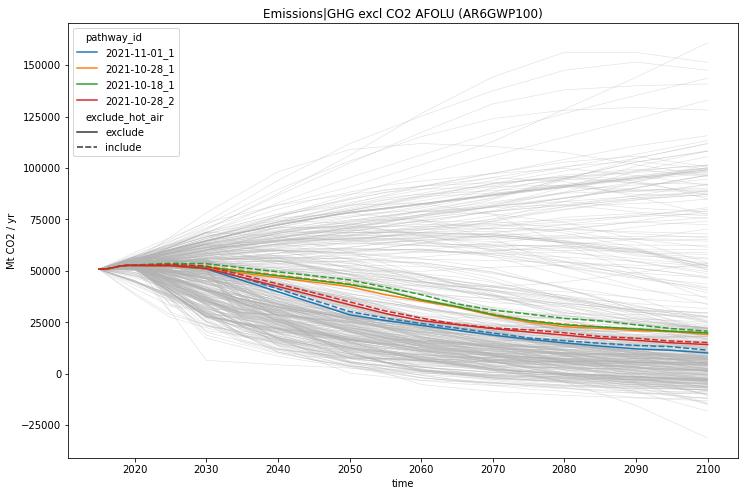

<IPython.core.display.Javascript object>

In [65]:
ax = plt.gca()

sr15_data_cleaned.filter(variable=LEAD).lineplot(ax=ax, **pkwargs)
extended_subset.filter(
    country_extension="SSP1BL",
    ambition="high",
    conditionality="C",
    year=range(2015, 2101),
).lineplot(ax=ax, hue="pathway_id", style="exclude_hot_air")
ax.set_title(extended_scenario_2050.get_unique_meta("variable", True))

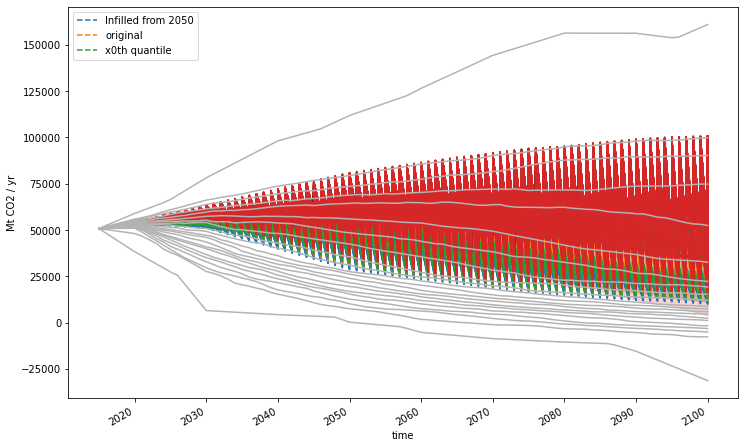

<IPython.core.display.Javascript object>

In [66]:
import numpy as np

extended_scenario_2050.filter(pathway_id=SELECTED_PATHWAY).lineplot(
    linestyle="--", dashes=(10, 15), label="Infilled from 2050", legend=False
)
# extended_scenario_2030.lineplot(
#     hue=None,
#     color="tab:orange",
#     linestyle="--",
#     dashes=(10, 15),
#     label="Infilled from 2030",
#     legend=False,
# )
extended_scenario_all.lineplot(
    label="original", legend=False, units="pathway_id", estimator=None
)
sr15_data_cleaned.filter(variable=LEAD).quantiles_over(
    ("id", "scenario", "model", "category"), quantiles=np.arange(0, 1.01, 0.05)
).T.plot(ax=plt.gca(), legend=False, color="0.7")

plt.legend(["Infilled from 2050", "original", "x0th quantile"])

# Infill other gases
We now have a scenario extended to 2100, now we need to split the GHG emissions into individual species

In [67]:
magicc_required_variables = [
    "Emissions|BC",
    "Emissions|C2F6",
    "Emissions|C6F14",
    "Emissions|CF4",
    "Emissions|CH4",
    "Emissions|CO",
    "Emissions|CO2|MAGICC AFOLU",
    "Emissions|CO2|MAGICC Fossil and Industrial",
    "Emissions|HFC125",
    "Emissions|HFC134a",
    "Emissions|HFC143a",
    "Emissions|HFC227ea",
    "Emissions|HFC23",
    "Emissions|HFC245fa",
    "Emissions|HFC32",
    "Emissions|HFC4310",
    "Emissions|N2O",
    "Emissions|NH3",
    "Emissions|NMVOC",
    "Emissions|NOx",
    "Emissions|OC",
    "Emissions|SF6",
    "Emissions|SOx",
]

# Order matters
# (name, cruncher, subtract_from_lead, variables_to_infill)
cruncher_config = [
    # Infill the important GHG gases
    # The CO2 equiv value of these emissions are subtracted from the Lead
    (
        "MajorGHG",
        LEAD,
        silicone.database_crunchers.QuantileRollingWindows,
        {"nwindows": 21, "decay_length_factor": 1},
        True,
        [
            "Emissions|CO2|MAGICC Fossil and Industrial",
            "Emissions|CH4",
            "Emissions|N2O",
            "Emissions|CF4",
            "Emissions|C2F6",
            "Emissions|C6F14",
            "Emissions|HFC134a",
            "Emissions|HFC143a",
            "Emissions|HFC227ea",
            "Emissions|HFC23",
            "Emissions|HFC32",
            "Emissions|HFC4310",
            "Emissions|HFC245fa",
            "Emissions|HFC125",
            "Emissions|SF6",
        ],
    ),
    # Infill any aerosol precursors
    (
        "AerosolPrecursors",
        LEAD,
        silicone.database_crunchers.QuantileRollingWindows,
        {"nwindows": 5, "decay_length_factor": 0.2},
        False,
        [
            "Emissions|BC",
            "Emissions|CO",
            "Emissions|NH3",
            "Emissions|NOx",
            "Emissions|OC",
            "Emissions|SOx",
            "Emissions|NMVOC",
        ],
    ),
    # Infill remaining FGases using a conservative method
    #     (
    #         "MinorGHG",
    #         # LEAD,
    #         LEAD + "|MajorGHG",
    #         TimeDepRatio,
    #         {},
    #         True,
    #         [
    #             "Emissions|CF4",
    #             "Emissions|C2F6",
    #             "Emissions|C6F14",
    #             "Emissions|HFC134a",
    #             "Emissions|HFC143a",
    #             "Emissions|HFC227ea",
    #             "Emissions|HFC23",
    #             "Emissions|HFC32",
    #             "Emissions|HFC4310",
    #             "Emissions|HFC245fa",
    #             "Emissions|HFC125",
    #             "Emissions|SF6",
    #         ],
    #     ),
]


infilled_later = [
    "Emissions|CO2|MAGICC AFOLU",  #  SSP2-1.9 (L37 in Harmonisation LandUse sheet)
]

# Check that we cover all required variable for MAGICC
infilled_variables = [item for sublist in cruncher_config for item in sublist[-1]]
assert sorted(magicc_required_variables) == sorted(
    infilled_variables + infilled_later
), set(magicc_required_variables) - set(infilled_variables + infilled_later)

<IPython.core.display.Javascript object>

In [68]:
YEARS_TO_INFILL = list(range(2015, 2100 + 1, 5))
LEAD

'Emissions|GHG excl CO2 AFOLU (AR6GWP100)'

<IPython.core.display.Javascript object>

In [69]:
YEARS_TO_INFILL

[2015,
 2020,
 2025,
 2030,
 2035,
 2040,
 2045,
 2050,
 2055,
 2060,
 2065,
 2070,
 2075,
 2080,
 2085,
 2090,
 2095,
 2100]

<IPython.core.display.Javascript object>

In [70]:
infilling_database = sr15_data_cleaned.filter(year=YEARS_TO_INFILL)

<IPython.core.display.Javascript object>

In [71]:
def _subtract(df, lead_var, new_lead_var, variables_to_subtract):
    run = scmdata.ScmRun(df)

    existing_lead = run.filter(variable=lead_var)
    added_variables = run.filter(variable=variables_to_subtract)

    added_ghg = calc_ghg(
        added_variables, var_name="GHG", include_vars=variables_to_subtract
    )

    lead_minus_others = existing_lead.subtract(
        added_ghg, op_cols={"variable": new_lead_var}
    )

    lead_minus_others["variable"] = new_lead_var
    return lead_minus_others


def infill_scenarios(scenario):
    infilling_database = (
        sr15_data_cleaned.filter(year=YEARS_TO_INFILL).copy().to_iamdataframe()
    )
    infilled_scenario = scenario.filter(year=YEARS_TO_INFILL).copy().to_iamdataframe()

    for config in tqdm(cruncher_config, desc="Cruncher", leave=False):
        (
            name,
            lead_var,
            cruncher_cls,
            params,
            subtract_from_lead,
            variables_to_infill,
        ) = config

        cruncher = cruncher_cls(infilling_database)
        for variable in tqdm(variables_to_infill, desc="Variable", leave=False):
            infiller = cruncher.derive_relationship(variable, [lead_var], **params)

            infilled = infiller(infilled_scenario)
            infilled_scenario.append(infilled, inplace=True)

        if subtract_from_lead:
            # subtract the added emissions from the lead
            new_lead_var = lead_var + "|" + name

            # Subtract a subset of variables from the lead variable
            new_lead_database = _subtract(
                infilling_database, lead_var, new_lead_var, variables_to_infill
            )
            new_lead_scenario = _subtract(
                infilled_scenario, lead_var, new_lead_var, variables_to_infill
            )

            # Merge into database
            infilling_database = scmdata.run_append(
                [scmdata.ScmRun(infilling_database), new_lead_database]
            ).to_iamdataframe()

            infilled_scenario = scmdata.run_append(
                [scmdata.ScmRun(infilled_scenario), new_lead_scenario]
            ).to_iamdataframe()

            lead_var = new_lead_var
    return scmdata.ScmRun(infilled_scenario)


infilled_scenario = infill_scenarios(extended_scenario_2050)

Cruncher:   0%|          | 0/2 [00:00<?, ?it/s]

Variable:   0%|          | 0/15 [00:00<?, ?it/s]

Variable:   0%|          | 0/7 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [1]:
#infilled_scenario.filter(variable=v).lineplot(ax=ax, label="Original", legend=False)

NameError: name 'infilled_scenario' is not defined

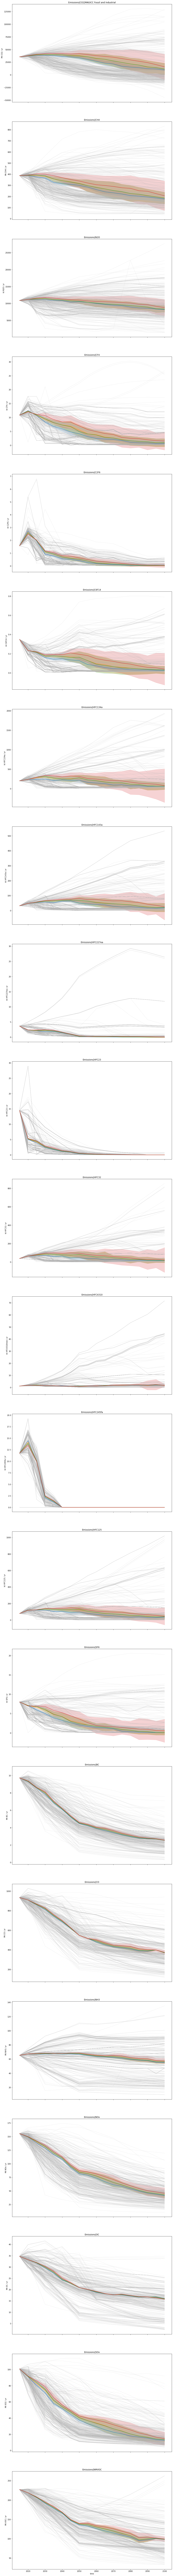

<IPython.core.display.Javascript object>

In [73]:
num_plots = len(infilled_variables)

fig = plt.figure(figsize=(16, 12 * num_plots))
axs = fig.subplots(num_plots, sharex=True)

for i, v in enumerate(infilled_variables):
    ax = axs[i]
    pkwargs = {
        "hue": None,
        "color": "0.7",
        "lw": 0.6,
        "alpha": 0.4,
        "units": "id",
        "estimator": None,
        "legend": False,
    }

    infilling_database.filter(variable=v).lineplot(ax=ax, **pkwargs)
    infilled_scenario.filter(variable=v).lineplot(ax=ax, label="Original", legend=False)
    ax.set_title(v)

In [74]:
infilled_scenario.filter(
    variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)"
).timeseries()

time                                                                                                                                                                                                                                         2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit        variable                                                 
high     C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  high__U  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
low      C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__C   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__U   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  low__U   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  

<IPython.core.display.Javascript object>

In [75]:
infilled_scenario_ghg = calc_ghg(
    infilled_scenario, include_vars=ghg_exclude_co2_vars, context=CONTEXT
)
infilled_scenario_ghg["stage"] = "infilled"

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Emissions|GHG excl CO2 AFOLU (AR6GWP100)'}, xlabel='time', ylabel='Mt CO2 / yr'>

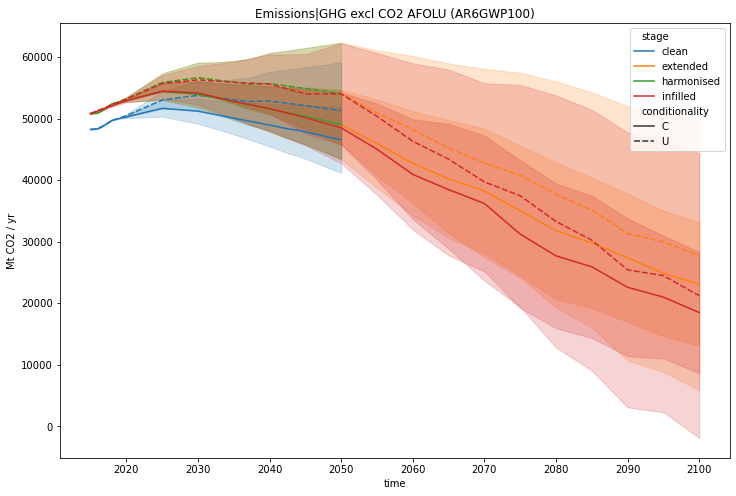

<IPython.core.display.Javascript object>

In [76]:
plt.title("Emissions|GHG excl CO2 AFOLU (AR6GWP100)")
scmdata.run_append(
    [
        selected_scenario_clean,
        extended_scenario_2050,
        selected_scenario,
        infilled_scenario_ghg,
    ]
).lineplot(hue="stage", style="conditionality")

In [77]:
infilled_scenario.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)*").lineplot(
    hue="variable"
)

<AxesSubplot:xlabel='time', ylabel='value'>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='value'>

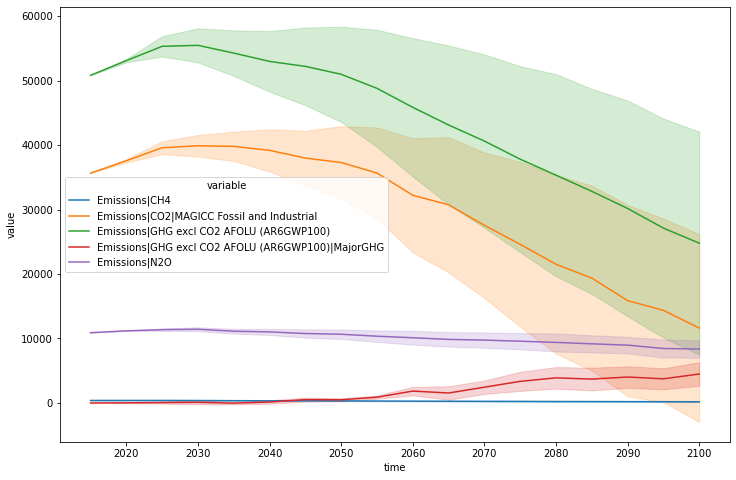

<IPython.core.display.Javascript object>

In [78]:
infilled_scenario.filter(
    variable=[
        "Emissions|CO2*",
        "Emissions|CH4",
        "Emissions|N2O",
        "Emissions|GHG excl CO2 AFOLU (AR6GWP100)*",
    ]
).lineplot(hue="variable")

In [79]:
infilled_scenario.filter(
    variable=[
        "Emissions|CO2*",
        "Emissions|CH4",
        "Emissions|N2O",
        "Emissions|GHG excl CO2 AFOLU (AR6GWP100)*",
    ]
).timeseries()

time                                                                                                                                                                                                                                                               2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit                     variable                                                          
high     C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CH4 / yr              Emissions|CH4                                        388.073000   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CH4 / yr              Emissions|CH4                                        388.073000   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CH4 / yr              Emissions|CH4                                        388.073000   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CH4 / yr              Emissions|CH4                                        388.073000   
                        2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         35635.300000   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         35635.300000   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         35635.300000   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         35635.300000   
                        2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
...                                                                                                                                                                                                                                                                       ...   
low      U              2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  low__U   extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  low__U   extend

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='Mt CH4 / yr'>

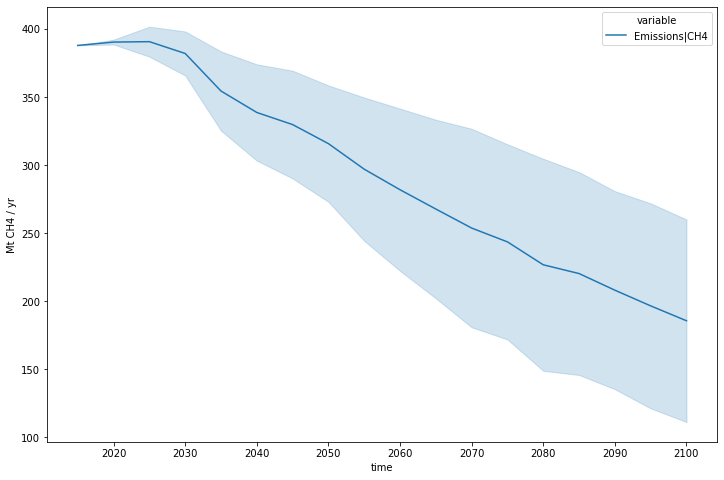

<IPython.core.display.Javascript object>

In [80]:
infilled_scenario.filter(variable=["Emissions|CH4"]).lineplot(hue="variable")

In [81]:
infilled_scenario.filter(
    variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)*"
).timeseries()

time                                                                                                                                                                                                                                                               2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit                     variable                                                          
high     C              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG     -1.180441   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG     -1.180441   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG     -1.180441   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__C  extended CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG     -1.180441   
         U              2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        2030              2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  high__U  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        SSP1BL            2021-10-18 include         n/a              BHR          NDC Factsheet 2021-10-18_1 341         1                 World  high__U  extended Mt CO2 / yr              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           50801.212705   
                        2030              2021-10-18 exclude         n/a              BHR          NDC Factsheet 2021-10-18_1 343         1                 World  high__U  extend

<IPython.core.display.Javascript object>

In [82]:
infilled_scenarios_all = infill_scenarios(extended_scenario_all)

Cruncher:   0%|          | 0/2 [00:00<?, ?it/s]

Variable:   0%|          | 0/15 [00:00<?, ?it/s]

Variable:   0%|          | 0/7 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [83]:
infilled_scenarios_all.head()

time                                                                                                                                                                                                          2015-01-01  2020-01-01  2025-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit       variable                                           
high     C              2030              2013-07-18 exclude         n/a              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  high__C  extended Mt BC / yr Emissions|BC     9.72742    9.441752    8.621183   
                        SSP1BL            2013-07-18 exclude         n/a              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  high__C  extended Mt BC / yr Emissions|BC     9.72742    9.441752    8.621183   
                        2030              2015-08-05 exclude         n/a              MKD          NDC Factsheet 2015-08-05_1 4           1                 World  high__C  extended Mt BC / yr Emissions|BC     9.72742    9.445827    8.634212   
                        SSP1BL            2015-08-05 exclude         n/a              MKD          NDC Factsheet 2015-08-05_1 4           1                 World  high__C  extended Mt BC / yr Emissions|BC     9.72742    9.445827    8.634212   
                        2030              2015-09-26 exclude         n/a              SEN          NDC Factsheet 2015-09-26_1 5           1                 World  high__C  extended Mt BC / yr Emissions|BC     9.72742    9.445883    8.634504   

time                                                                                                                                                                                                          2030-01-01  2035-01-01  2040-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit       variable                                           
high     C              2030              2013-07-18 exclude         n/a              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  high__C  extended Mt BC / yr Emissions|BC    8.119629    7.098043    6.267729   
                        SSP1BL            2013-07-18 exclude         n/a              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  high__C  extended Mt BC / yr Emissions|BC    8.119629    7.097633    6.267344   
                        2030              2015-08-05 exclude         n/a              MKD          NDC Factsheet 2015-08-05_1 4           1                 World  high__C  extended Mt BC / yr Emissions|BC    8.147366    7.116328    6.277037   
                        SSP1BL            2015-08-05 exclude         n/a              MKD          NDC Factsheet 2015-08-05_1 4           1                 World  high__C  extended Mt BC / yr Emissions|BC    8.147366    7.113775    6.274639   
                        2030              2015-09-26 exclude         n/a              SEN          NDC Factsheet 2015-09-26_1 5           1                 World  high__C  extended Mt BC / yr Emissions|BC    8.148049    7.116804    6.277276   

time                                                                                                                                                                                                          2045-01-01  ...  2070-01-01  2075-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit       variable                  ...                           
high     C              2030              2013-07-18 exclude         n/a            

<IPython.core.display.Javascript object>

In [84]:
# num_plots = len(infilled_variables)

# fig = plt.figure(figsize=(16, 4 * num_plots))
# axs = fig.subplots(num_plots, sharex=True)

# for i, v in enumerate(infilled_variables):
#     ax = axs[i]
#     pkwargs = {
#         "hue": None,
#         "color": "0.7",
#         "lw": 0.6,
#         "alpha": 0.4,
#         "units": "id",
#         "estimator": None,
#         "legend": False,
#     }

#     sr15_data_cleaned.filter(year=YEARS_TO_INFILL, variable=v).lineplot(
#         ax=ax, **pkwargs
#     )
#     infilled_scenarios_all.filter(variable=v, exclude_hot_air="exclude").lineplot(
#         ax=ax,
#         legend=False,
#         style="country_extension",
#         units="pathway_id",
#         estimator=None,
#     )
#     ax.set_title(v)

<IPython.core.display.Javascript object>

## Add AFOLU

In [85]:
AFOLU_SELECTED_SCENARIO = "Adjusted NDCs FOLU (SSP1-1.9)"

<IPython.core.display.Javascript object>

In [86]:
afolu = scmdata.ScmRun(
    os.path.join(
        PROCESSED_DATA_DIR, "global_emissions", NDC_TARGET_RELEASE, "landuse.csv"
    )
).convert_unit("Mt CO2 / yr")
afolu

<scmdata.ScmRun (timeseries: 7, timepoints: 71)>
Time:
	Start: 1980-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	           model region                       scenario         unit        variable
	0  NDC Factsheet  World  Adjusted NDCs FOLU (SSP1-1.9)  Mt CO2 / yr  Emissions|FOLU
	1  NDC Factsheet  World  Adjusted NDCs FOLU (SSP1-2.6)  Mt CO2 / yr  Emissions|FOLU
	2  NDC Factsheet  World  Adjusted NDCs FOLU (SSP2-4.5)  Mt CO2 / yr  Emissions|FOLU
	3  NDC Factsheet  World          Global Carbon Project  Mt CO2 / yr  Emissions|FOLU
	4  NDC Factsheet  World                       SSP1-1.9  Mt CO2 / yr  Emissions|FOLU
	5  NDC Factsheet  World                       SSP1-2.6  Mt CO2 / yr  Emissions|FOLU
	6  NDC Factsheet  World                       SSP2-4.5  Mt CO2 / yr  Emissions|FOLU

<IPython.core.display.Javascript object>

In [87]:
afolu.lineplot(hue="scenario")

<AxesSubplot:xlabel='time', ylabel='Mt CO2 / yr'>

<IPython.core.display.Javascript object>

In [88]:
selected_afolu = afolu.filter(
    scenario=AFOLU_SELECTED_SCENARIO, year=range(2000, 2101)
).convert_unit("Mt CO2 / yr")
selected_afolu["variable"] = "Emission|CO2|MAGICC AFOLU"
selected_afolu

<scmdata.ScmRun (timeseries: 1, timepoints: 51)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2050-01-01T00:00:00
Meta:
	           model region                       scenario         unit                   variable
	0  NDC Factsheet  World  Adjusted NDCs FOLU (SSP1-1.9)  Mt CO2 / yr  Emission|CO2|MAGICC AFOLU

<IPython.core.display.Javascript object>

In [89]:
sr15_afolu = sr15_data.filter(variable="Emissions|CO2|MAGICC AFOLU").convert_unit(
    "Mt CO2 / yr"
)

<IPython.core.display.Javascript object>

In [90]:
extended_afolu = extend_timeseries(
    sr15_afolu, selected_afolu, lead="Emissions|CO2|MAGICC AFOLU"
)
extended_afolu

<scmdata.ScmRun (timeseries: 1, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	           model region                       scenario     stage         unit                    variable
	0  NDC Factsheet  World  Adjusted NDCs FOLU (SSP1-1.9)  extended  Mt CO2 / yr  Emissions|CO2|MAGICC AFOLU

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Database CO$_2$|AFOLU and lead emissions timeseries')

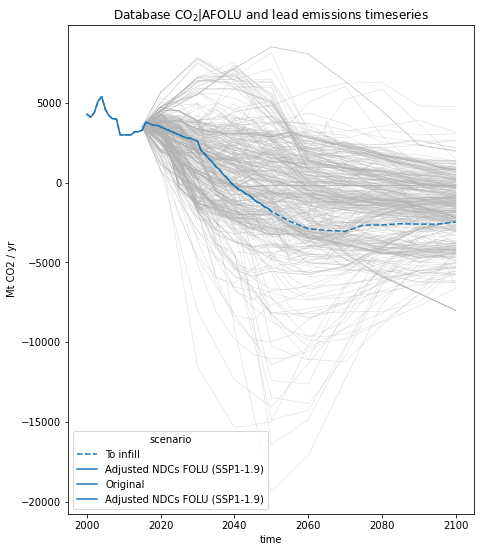

<IPython.core.display.Javascript object>

In [91]:
pkwargs = {
    "hue": None,
    "color": "0.7",
    "lw": 0.6,
    "alpha": 0.4,
    "units": "id",
    "estimator": None,
    "legend": False,
}

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(121)

sr15_afolu.lineplot(ax=ax, **pkwargs)
extended_afolu.lineplot(ax=ax, linestyle="--", dashes=(10, 15), label="To infill")
selected_afolu.lineplot(ax=ax, label="Original")
ax.set_title("Database CO$_2$|AFOLU and lead emissions timeseries")

In [92]:
def add_afolu(scenario):
    infilled_scenario_complete = (
        scenario.append(extended_afolu).filter(year=range(2000, 2101)).resample("AS")
    )
    infilled_scenario_complete["global_extension"] = "silicone"
    infilled_scenario_complete["ambition"] = scenario.get_unique_meta("ambition")
    infilled_scenario_complete["conditionality"] = scenario.get_unique_meta(
        "conditionality"
    )
    infilled_scenario_complete["exclude_hot_air"] = scenario.get_unique_meta(
        "exclude_hot_air"
    )
    infilled_scenario_complete["country_extension"] = scenario.get_unique_meta(
        "country_extension"
    )
    infilled_scenario_complete["pathway_id"] = scenario.get_unique_meta("pathway_id")
    infilled_scenario_complete["stage"] = "infilled"

    infilled_scenario_complete["scenario"] = scenario.get_unique_meta("scenario")

    return infilled_scenario_complete

<IPython.core.display.Javascript object>

In [93]:
infilled_scenarios_complete_all = []

for infilled_scenario in tqdm(
    infilled_scenarios_all.groupby(
        [
            "ambition",
            "conditionality",
            "country_extension",
            "exclude_hot_air",
            "pathway_id",
        ]
    )
):
    infilled_scenario_complete = add_afolu(infilled_scenario)
    infilled_scenarios_complete_all.append(infilled_scenario_complete)

infilled_scenarios_complete_all = scmdata.run_append(infilled_scenarios_complete_all)

0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

In [94]:
infilled_scenario_complete.timeseries()

time                                                                                                                                                                                                                                                               2000-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit                     variable                                                          
low      U              SSP1BL            2021-11-09 include         silicone         VEN          NDC Factsheet 2021-11-09_1 352.0       1.0               World  low__U   infilled Mt BC / yr               Emissions|BC                                          10.858633   
                                                                                                                                                                                     kt C2F6 / yr             Emissions|C2F6                                        -1.391014   
                                                                                                                                                                                     kt C6F14 / yr            Emissions|C6F14                                        0.701533   
                                                                                                                                                                                     kt CF4 / yr              Emissions|CF4                                          6.972240   
                                                                                                                                                                                     Mt CH4 / yr              Emissions|CH4                                        378.375466   
                                                                                                                                                                                     Mt CO / yr               Emissions|CO                                        1009.764058   
                                                                                                                                                                                     Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         29499.209187   
                                                                                                                                                                                                              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           43616.133417   
                                                                                                                                                                                     CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG      1.251652   
                                                                                                                                                                                     kt HFC125 / yr           Emissions|HFC125                                     -42.843654   
                                                                                                                                                                                     kt HFC134a / yr          Emissions|HFC134a                                     89.457909   
                                                                                                                                                                                     kt HFC143a / yr          Emissions|HFC143a                                    -16.366449   
                                                                                                                                                                                  

<IPython.core.display.Javascript object>

In [95]:
infilled_scenarios_complete_all.timeseries()

time                                                                                                                                                                                                                                                               2000-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario stage    unit                     variable                                                          
high     C              2030              2013-07-18 exclude         silicone         LBY          NDC Factsheet 2013-07-18_1 1.0         1.0               World  high__C  infilled Mt BC / yr               Emissions|BC                                          10.584580   
                                                                                                                                                                                     kt C2F6 / yr             Emissions|C2F6                                        -0.751176   
                                                                                                                                                                                     kt C6F14 / yr            Emissions|C6F14                                        0.700447   
                                                                                                                                                                                     kt CF4 / yr              Emissions|CF4                                          8.525836   
                                                                                                                                                                                     Mt CH4 / yr              Emissions|CH4                                        363.312893   
                                                                                                                                                                                     Mt CO / yr               Emissions|CO                                        1003.255042   
                                                                                                                                                                                     Mt CO2 / yr              Emissions|CO2|MAGICC Fossil and Industrial         27316.976358   
                                                                                                                                                                                                              Emissions|GHG excl CO2 AFOLU (AR6GWP100)           41110.760556   
                                                                                                                                                                                     CO2 * megametric_ton / a Emissions|GHG excl CO2 AFOLU (AR6GWP100)|MajorGHG     46.307138   
                                                                                                                                                                                     kt HFC125 / yr           Emissions|HFC125                                     -35.406542   
...                                                                                                                                                                                                                                                                       ...   
low      U              SSP1BL            2021-11-09 include         silicone         VEN          NDC Factsheet 2021-11-09_1 352.0       1.0               World  low__U   infilled kt HFC32 / yr            Emissions|HFC32                                      -39.130476   
                                                                                                                                                                                  

<IPython.core.display.Javascript object>

In [96]:
global_db.delete(global_extension="silicone")

global_db.save(
    infilled_scenarios_complete_all.drop_meta(
        ["last_country", "pathway_num", "pathway_num_today", "date"]
    )
)

Saving to database: 0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

In [97]:
infilled_scenarios_complete_all.meta[
    ["ambition", "conditionality", "country_extension", "exclude_hot_air"]
].drop_duplicates()

ambition conditionality country_extension exclude_hot_air
0          high              C              2030         exclude
8850       high              C              2030         include
17700      high              C            SSP1BL         exclude
26550      high              C            SSP1BL         include
35400      high              U              2030         exclude
44250      high              U              2030         include
53050      high              U            SSP1BL         exclude
61900      high              U            SSP1BL         include
70700       low              C              2030         exclude
79550       low              C              2030         include
88400       low              C            SSP1BL         exclude
97250       low              C            SSP1BL         include
106100      low              U              2030         exclude
114950      low              U              2030         include
123750      low              U            SSP1BL         exclude
132600      low              U            SSP1BL         include

<IPython.core.display.Javascript object>

In [98]:
for c in [
    "ambition",
    "conditionality",
    "country_extension",
    "exclude_hot_air",
    "pathway_id",
]:
    print(infilled_scenarios_complete_all.get_unique_meta(c))

['high', 'low']
['C', 'U']
['2030', 'SSP1BL']
['exclude', 'include']
['2013-07-18_1', '2013-07-18_2', '2013-07-18_3', '2015-08-05_1', '2015-09-26_1', '2015-09-30_1', '2015-09-30_2', '2015-10-01_1', '2015-10-01_2', '2015-11-12_1', '2015-11-21_1', '2015-11-23_1', '2015-12-01_1', '2016-03-24_1', '2016-04-07_1', '2016-04-18_1', '2016-04-20_1', '2016-04-22_1', '2016-04-22_10', '2016-04-22_11', '2016-04-22_12', '2016-04-22_2', '2016-04-22_3', '2016-04-22_4', '2016-04-22_5', '2016-04-22_6', '2016-04-22_7', '2016-04-22_8', '2016-04-22_9', '2016-04-29_1', '2016-05-10_1', '2016-05-10_2', '2016-05-10_3', '2016-05-10_4', '2016-05-10_5', '2016-05-10_6', '2016-05-10_7', '2016-05-20_1', '2016-06-20_1', '2016-06-29_1', '2016-07-25_1', '2016-07-29_1', '2016-09-01_1', '2016-09-03_1', '2016-09-03_2', '2016-09-07_1', '2016-09-15_1', '2016-09-19_1', '2016-09-19_2', '2016-09-21_1', '2016-09-21_10', '2016-09-21_11', '2016-09-21_12', '2016-09-21_13', '2016-09-21_14', '2016-09-21_15', '2016-09-21_16', '2016-09

<IPython.core.display.Javascript object>

In [99]:
infilled_scenarios_complete_all.meta[["pathway_id"]].drop_duplicates()

pathway_id
0     2013-07-18_1
25    2013-07-18_2
50    2013-07-18_3
75    2015-08-05_1
100   2015-09-26_1
125   2015-09-30_1
150   2015-09-30_2
175   2015-10-01_1
200   2015-10-01_2
225   2015-11-12_1
...            ...
8600  2021-10-21_1
8625  2021-10-22_1
8650  2021-10-23_1
8675  2021-10-25_1
8700  2021-10-28_1
8725  2021-10-28_2
8750  2021-10-30_1
8775  2021-11-01_1
8800  2021-11-03_1
8825  2021-11-09_1

[354 rows x 1 columns]

<IPython.core.display.Javascript object>